<a href="https://colab.research.google.com/github/DodgerM1127/Data-Mining-class/blob/main/Projekt_predictive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build and interpret a Decision Tree Classifier using the "ABT_with_clusters.csv" dataset to predict customer segments ('cluster_label') based on demographic attributes, evaluate its performance, extract actionable decision rules for business interpretation, and assess its suitability for solving 'cold start' problems.

## Naloži podatke in preglej

### Subtask:
Naložite podatkovno zbirko 'ABT_with_clusters.csv' v DataFrame in preglejte njeno strukturo, vključno z imeni stolpcev in tipi podatkov, da potrdite razpoložljivost potrebnih atributov in ciljne spremenljivke 'cluster_label'.


**Reasoning**:
First, I'll import the pandas library to work with DataFrames. Then, I'll load the specified CSV file into a DataFrame. Finally, I'll display the head of the DataFrame, its information, and the column names to inspect its structure as requested.



In [14]:
import pandas as pd

df = pd.read_csv('/content/ABT_with_clusters.csv')

print('First 5 rows of the DataFrame:')
print(df.head())

print('\nDataFrame Information:')
df.info()

print('\nColumn names:')
print(df.columns)

First 5 rows of the DataFrame:
   CUSTOMER_ID                 AS_OF_TS  AS_OF_DATE DEM_COUNTRY  \
0            1  2022-11-01 22:59:59.000  2022-11-01     Germany   
1            2  2022-11-01 22:59:59.000  2022-11-01      Brazil   
2            3  2022-11-01 22:59:59.000  2022-11-01      Poland   
3            4  2022-11-01 22:59:59.000  2022-11-01      Poland   
4            5  2022-11-01 22:59:59.000  2022-11-01       Spain   

  DEM_COUNTRY_GROUP  DEM_CONTINENT DEM_GENDER DEM_MARITAL_STATUS  \
0           Germany         Europe     Female             Single   
1            Brazil  South America       Male             Single   
2            Poland         Europe     Female            Married   
3            Poland         Europe     Female             Single   
4             Spain         Europe     Female            Married   

   DEM_CHILDREN_COUNT_INT  DEM_HAS_CHILDREN_FLAG  ... TIME_PCT_ORDERS_WEEKEND  \
0                     0.0                      0  ...                0.28378

## Priprava podatkov: Izbira atributov in obdelava manjkajočih vrednosti

### Subtask:
Izberite samo določene demografske atribute ('DEM_COUNTRY', 'DEM_COUNTRY_GROUP', 'DEM_CONTINENT', 'DEM_GENDER', 'DEM_MARITAL_STATUS', 'DEM_HAS_CHILDREN_FLAG', 'DEM_AGE_BUCKET') in ciljno spremenljivko 'cluster_label'. Obdelajte morebitne manjkajoče vrednosti v teh izbranih atributih. Po potrebi prepoznajte in obdelajte kategorije, kot je 'Unknown'.


**Reasoning**:
First, I'll create a new DataFrame with the specified demographic attributes and the target variable 'Cluster_ID'. Then, I will check for any missing values within these selected columns. Finally, I'll print the unique values for each categorical column to identify potential 'Unknown' or similar categories that need further handling, as specified in the subtask.



In [15]:
selected_columns = ['DEM_COUNTRY', 'DEM_COUNTRY_GROUP', 'DEM_CONTINENT', 'DEM_GENDER', 'DEM_MARITAL_STATUS', 'DEM_HAS_CHILDREN_FLAG', 'DEM_AGE_BUCKET', 'Cluster_ID']
df_selected = df[selected_columns].copy()

print('Selected DataFrame head:')
print(df_selected.head())

print('\nChecking for missing values in selected columns:')
print(df_selected.isnull().sum())

print('\nUnique values for categorical columns (to identify "Unknown" categories):')
categorical_cols = ['DEM_COUNTRY', 'DEM_COUNTRY_GROUP', 'DEM_CONTINENT', 'DEM_GENDER', 'DEM_MARITAL_STATUS', 'DEM_AGE_BUCKET']
for col in categorical_cols:
    print(f'\nUnique values for {col}:')
    print(df_selected[col].unique())

Selected DataFrame head:
  DEM_COUNTRY DEM_COUNTRY_GROUP  DEM_CONTINENT DEM_GENDER DEM_MARITAL_STATUS  \
0     Germany           Germany         Europe     Female             Single   
1      Brazil            Brazil  South America       Male             Single   
2      Poland            Poland         Europe     Female            Married   
3      Poland            Poland         Europe     Female             Single   
4       Spain             Spain         Europe     Female            Married   

   DEM_HAS_CHILDREN_FLAG DEM_AGE_BUCKET  Cluster_ID  
0                      0            65+           1  
1                      0          45-54           1  
2                      1          18-24           1  
3                      1            65+           1  
4                      1          35-44           1  

Checking for missing values in selected columns:
DEM_COUNTRY              0
DEM_COUNTRY_GROUP        0
DEM_CONTINENT            0
DEM_GENDER               0
DEM_MARITAL_

## Priprava podatkov: Kodiranje kategoričnih spremenljivk

### Subtask:
Uporabite One-Hot Encoding za vse izbrane kategorične vhodne spremenljivke, da jih pretvorite v numerično obliko, primerno za model Decision Tree. Prepričajte se, da so vse funkcije predhodno obdelane.


**Reasoning**:
First, I'll identify the categorical columns that need to be one-hot encoded and apply `pd.get_dummies` to them, merging the results back into `df_selected` while dropping the original categorical columns. Then, I'll print the head and info of the modified DataFrame to verify the successful conversion of categorical features into numerical ones.



In [16]:
categorical_cols_to_encode = ['DEM_COUNTRY', 'DEM_COUNTRY_GROUP', 'DEM_CONTINENT', 'DEM_GENDER', 'DEM_MARITAL_STATUS', 'DEM_AGE_BUCKET']

df_encoded = pd.get_dummies(df_selected, columns=categorical_cols_to_encode, drop_first=True, dtype=int)

print('DataFrame after One-Hot Encoding:')
print(df_encoded.head())

print('\nDataFrame Information after One-Hot Encoding:')
df_encoded.info()

DataFrame after One-Hot Encoding:
   DEM_HAS_CHILDREN_FLAG  Cluster_ID  DEM_COUNTRY_Brazil  DEM_COUNTRY_Canada  \
0                      0           1                   0                   0   
1                      0           1                   1                   0   
2                      1           1                   0                   0   
3                      1           1                   0                   0   
4                      1           1                   0                   0   

   DEM_COUNTRY_Egypt  DEM_COUNTRY_France  DEM_COUNTRY_Germany  \
0                  0                   0                    1   
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   

   DEM_COUNTRY_India  DEM_COUNTRY_Japan  DEM_COUNTRY_Poland  ...  \
0                  0      

## Razdelitev podatkov na učno in testno množico

### Subtask:
Razdelite obdelane podatke na učno (80%) in testno (20%) množico. Uporabite stratificirano delitev glede na 'cluster_label', da zagotovite enako zastopanost vseh razredov v obeh množicah.


**Reasoning**:
First, I will define the feature matrix X and the target vector y from the `df_encoded` DataFrame. Then, I will import the `train_test_split` function and use it to divide the data into training and testing sets, ensuring stratification by the target variable and reproducibility with a fixed random state. Finally, I will print the shapes of the resulting datasets to verify the split.



In [17]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Cluster_ID', axis=1)
y = df_encoded['Cluster_ID']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (178032, 43)
Shape of X_test: (44508, 43)
Shape of y_train: (178032,)
Shape of y_test: (44508,)


## Učenje modela Decision Tree Classifier

### Subtask:
Inicializirajte in naučite Decision Tree Classifier na učni množici. Omejite globino drevesa (npr. max_depth=4), da zagotovite boljšo interpretacijo in preprečite prekomerno prilagajanje.


**Reasoning**:
To train a Decision Tree Classifier, I will first import the necessary class, then instantiate it with the specified parameters (`max_depth=4`, `random_state=42`), and finally fit the model to the training data.



In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully with max_depth=4.")

Decision Tree Classifier trained successfully with max_depth=4.


## Evalvacija modela

### Subtask:
Evaluirajte naučeni model na testni množici. Izračunajte in prikažite meritev, kot so Accuracy, Precision, Recall, F1-score ter Confusion Matrix. Te metrike bodo pomagale oceniti uspešnost modela.


**Reasoning**:
I will first make predictions on the test data using the trained Decision Tree Classifier. Then, I will import the necessary metrics from `sklearn.metrics` to evaluate the model's performance. Finally, I will calculate and display the accuracy, classification report (Precision, Recall, F1-score), and the confusion matrix to assess the model's effectiveness, as requested by the subtask.



In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Predict classes on the test set
y_pred = dt_classifier.predict(X_test)

# 3. Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 4. Calculate and print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.6674

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.48      0.59     21888
           1       0.63      0.84      0.72     22620

    accuracy                           0.67     44508
   macro avg       0.69      0.66      0.65     44508
weighted avg       0.69      0.67      0.66     44508


Confusion Matrix:
[[10596 11292]
 [ 3511 19109]]


## Priprava podatkov in modeliranje z Decision Tree ter Random Forest Classifierjem

V tem delu naloge bomo razširili analizo in primerjali dva modela: `DecisionTreeClassifier` in `RandomForestClassifier`. Vsak model bomo testirali z dvema različnima naboroma funkcij:

*   **Feature Set A (Demografija)**: Vključuje samo demografske podatke.
*   **Feature Set B (Demografija + Podatki prvega nakupa)**: Vključuje demografske podatke in podatke o prvem nakupu.

Cilj je napovedati `Cluster_ID` (segment kupca). Vsi modeli bodo uporabljali isti stratificiran razdelitev na učno/testno množico, da zagotovimo pošteno primerjavo.

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming ABT_with_clusters.csv is in /content/)
try:
    df = pd.read_csv('/content/ABT_with_clusters.csv')
    print("Dataset 'ABT_with_clusters.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'ABT_with_clusters.csv' not found. Please ensure the file is uploaded.")
    exit()

# Define target variable
TARGET = 'Cluster_ID'


Dataset 'ABT_with_clusters.csv' loaded successfully.


### 1. Funkcija za pripravo nabora funkcij (feature sets) in predobdelavo

In [21]:
def prepare_features(dataframe, feature_names):
    # Extract features and target
    X = dataframe[feature_names].copy()
    y = dataframe[TARGET]

    # Identify numerical and categorical features within the selected set
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(include='object').columns.tolist()

    # Create a preprocessor using ColumnTransformer
    # No scaling for numerical features as requested for tree-based models
    # For categorical, handle potentially 'Unknown' values by OneHotEncoder
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', 'passthrough', numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ],
        remainder='drop' # Drop other columns not specified in feature_names
    )

    # Fit and transform the data
    X_processed_array = preprocessor.fit_transform(X)

    # Get feature names after one-hot encoding
    # This part can be tricky, ensure it works for both cases (num and cat features present)
    new_column_names = []
    for name, trans, cols in preprocessor.transformers_:
        if name == 'num':
            new_column_names.extend(cols)
        elif name == 'cat':
            new_column_names.extend(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

    X_processed = pd.DataFrame(X_processed_array, columns=new_column_names, index=X.index)

    return X_processed, y, preprocessor

# Define feature sets
FEATURE_SET_A = [
    'DEM_COUNTRY_GROUP',
    'DEM_GENDER',
    'DEM_MARITAL_STATUS',
    'DEM_HAS_CHILDREN_FLAG',
    'DEM_AGE_BUCKET'
]

FEATURE_SET_B = FEATURE_SET_A + [
    'FP_ORDER_HOUR',
    'FP_IS_WEEKEND_FLAG',
    'FP_ORDER_TOTAL',
    'FP_N_ITEMS',
    'FP_N_DISTINCT_ITEMS'
]

print("Feature sets defined.")


Feature sets defined.


### 2. Funkcija za učenje in evalvacijo modela

In [22]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model, model_name, feature_set_name):
    print(f"\n--- Training {model_name} with {feature_set_name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Get feature importances
    feature_importances = None
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
        print("\nTop 10 Feature Importances:")
        print(feature_importances.head(10))

    return {
        'model': model_name,
        'feature_set': feature_set_name,
        'accuracy': accuracy,
        'macro_f1': report['macro avg']['f1-score'],
        'weighted_f1': report['weighted avg']['f1-score'],
        'feature_importances': feature_importances
    }


### 3. Glavni izvajalnik (Runner) eksperimentov

In [23]:
all_results = []
RANDOM_STATE = 42

# Prepare data for Feature Set A
X_A, y_A, preprocessor_A = prepare_features(df, FEATURE_SET_A)
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.2, random_state=RANDOM_STATE, stratify=y_A)
print(f"\nShape of X_train_A: {X_train_A.shape}")

# Prepare data for Feature Set B
X_B, y_B, preprocessor_B = prepare_features(df, FEATURE_SET_B)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.2, random_state=RANDOM_STATE, stratify=y_B)
print(f"Shape of X_train_B: {X_train_B.shape}")

# Models to test
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=RANDOM_STATE, n_jobs=-1) # n_jobs=-1 to use all available cores
}

# Run experiments for all combinations
for model_name, model_obj in models.items():
    # Feature Set A
    results_A = train_and_evaluate_model(X_train_A, X_test_A, y_train_A, y_test_A, model_obj, model_name, 'Demographic Only')
    all_results.append(results_A)

    # Feature Set B
    results_B = train_and_evaluate_model(X_train_B, X_test_B, y_train_B, y_test_B, model_obj, model_name, 'Demographic + First Purchase')
    all_results.append(results_B)


# Display comparison table
print("\n======================================================")
print("                Model Comparison Summary              ")
print("======================================================")
comparison_df = pd.DataFrame(all_results)[['model', 'feature_set', 'accuracy', 'macro_f1', 'weighted_f1']]
display(comparison_df)



Shape of X_train_A: (178032, 28)
Shape of X_train_B: (178032, 33)

--- Training Decision Tree with Demographic Only ---
Accuracy: 0.6936

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65     21888
           1       0.66      0.81      0.73     22620

    accuracy                           0.69     44508
   macro avg       0.70      0.69      0.69     44508
weighted avg       0.70      0.69      0.69     44508


Confusion Matrix:
[[12652  9236]
 [ 4402 18218]]

Top 10 Feature Importances:
DEM_COUNTRY_GROUP_United States          0.355232
DEM_COUNTRY_GROUP_Germany                0.201335
DEM_COUNTRY_GROUP_France                 0.162982
DEM_COUNTRY_GROUP_Australia              0.147001
DEM_COUNTRY_GROUP_Japan                  0.132288
DEM_MARITAL_STATUS_Divorced/Seperated    0.000275
DEM_GENDER_Male                          0.000200
DEM_AGE_BUCKET_18-24                     0.000178
DEM_GENDER_Undisclosed          

,model,feature_set,accuracy,macro_f1,weighted_f1
0,Decision Tree,Demographic Only,0.693583,0.688715,0.689355
1,Decision Tree,Demographic + First Purchase,0.671834,0.660991,0.661988
2,Random Forest,Demographic Only,0.693853,0.689244,0.689867
3,Random Forest,Demographic + First Purchase,0.719938,0.719867,0.719794


## Interpretacija modela: Pomembnost značilnosti

### Subtask:
Prikažite pomembnost (feature importance) posameznih atributov v naučenem Decision Tree modelu. To bo razkrilo, kateri demografski dejavniki imajo največji vpliv na napovedovanje segmenta kupcev.


**Reasoning**:
To identify which demographic factors have the greatest impact on predicting customer segments, I will extract feature importances from the trained Decision Tree Classifier, associate them with their respective feature names, sort them in descending order, and then print the results.



In [24]:
import pandas as pd

# Get feature importances from the trained Decision Tree Classifier
feature_importimportances = dt_classifier.feature_importances_

# Create a Pandas Series for better visualization and sorting
feature_importance_series = pd.Series(feature_importimportances, index=X.columns)

# Sort the features by importance in descending order
sorted_feature_importimportances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances (Top Features):")
print(sorted_feature_importimportances)

Feature Importances (Top Features):
DEM_COUNTRY_United States           0.416736
DEM_COUNTRY_Germany                 0.236193
DEM_COUNTRY_France                  0.191201
DEM_COUNTRY_Japan                   0.155191
DEM_AGE_BUCKET_18-24                0.000189
DEM_GENDER_Male                     0.000150
DEM_HAS_CHILDREN_FLAG               0.000097
DEM_MARITAL_STATUS_Undisclosed      0.000089
DEM_GENDER_Undisclosed              0.000074
DEM_MARITAL_STATUS_Single           0.000061
DEM_AGE_BUCKET_35-44                0.000018
DEM_COUNTRY_South Korea             0.000000
DEM_COUNTRY_South Africa            0.000000
DEM_COUNTRY_Poland                  0.000000
DEM_COUNTRY_India                   0.000000
DEM_COUNTRY_Egypt                   0.000000
DEM_COUNTRY_Canada                  0.000000
DEM_COUNTRY_Brazil                  0.000000
DEM_COUNTRY_Spain                   0.000000
DEM_COUNTRY_GROUP_India             0.000000
DEM_COUNTRY_GROUP_Japan             0.000000
DEM_COUNTRY_Sweden 

## Interpretacija modela: Vizualizacija drevesa in izpeljava pravil

### Subtask:
Vizualizirajte Decision Tree, da prikažete potek odločanja. Poleg tega izpeljite jasna odločitvena pravila iz drevesa v obliki 'Če je kupec X in Y, potem verjetno cluster Z', kar bo ključno za poslovno interpretacijo.


**Reasoning**:
To visualize the decision tree and extract decision rules, I will import `matplotlib.pyplot`, `export_text`, and `plot_tree`. Then, I will use `plot_tree` to render the tree with specified aesthetics and `export_text` to generate human-readable rules from the trained classifier.



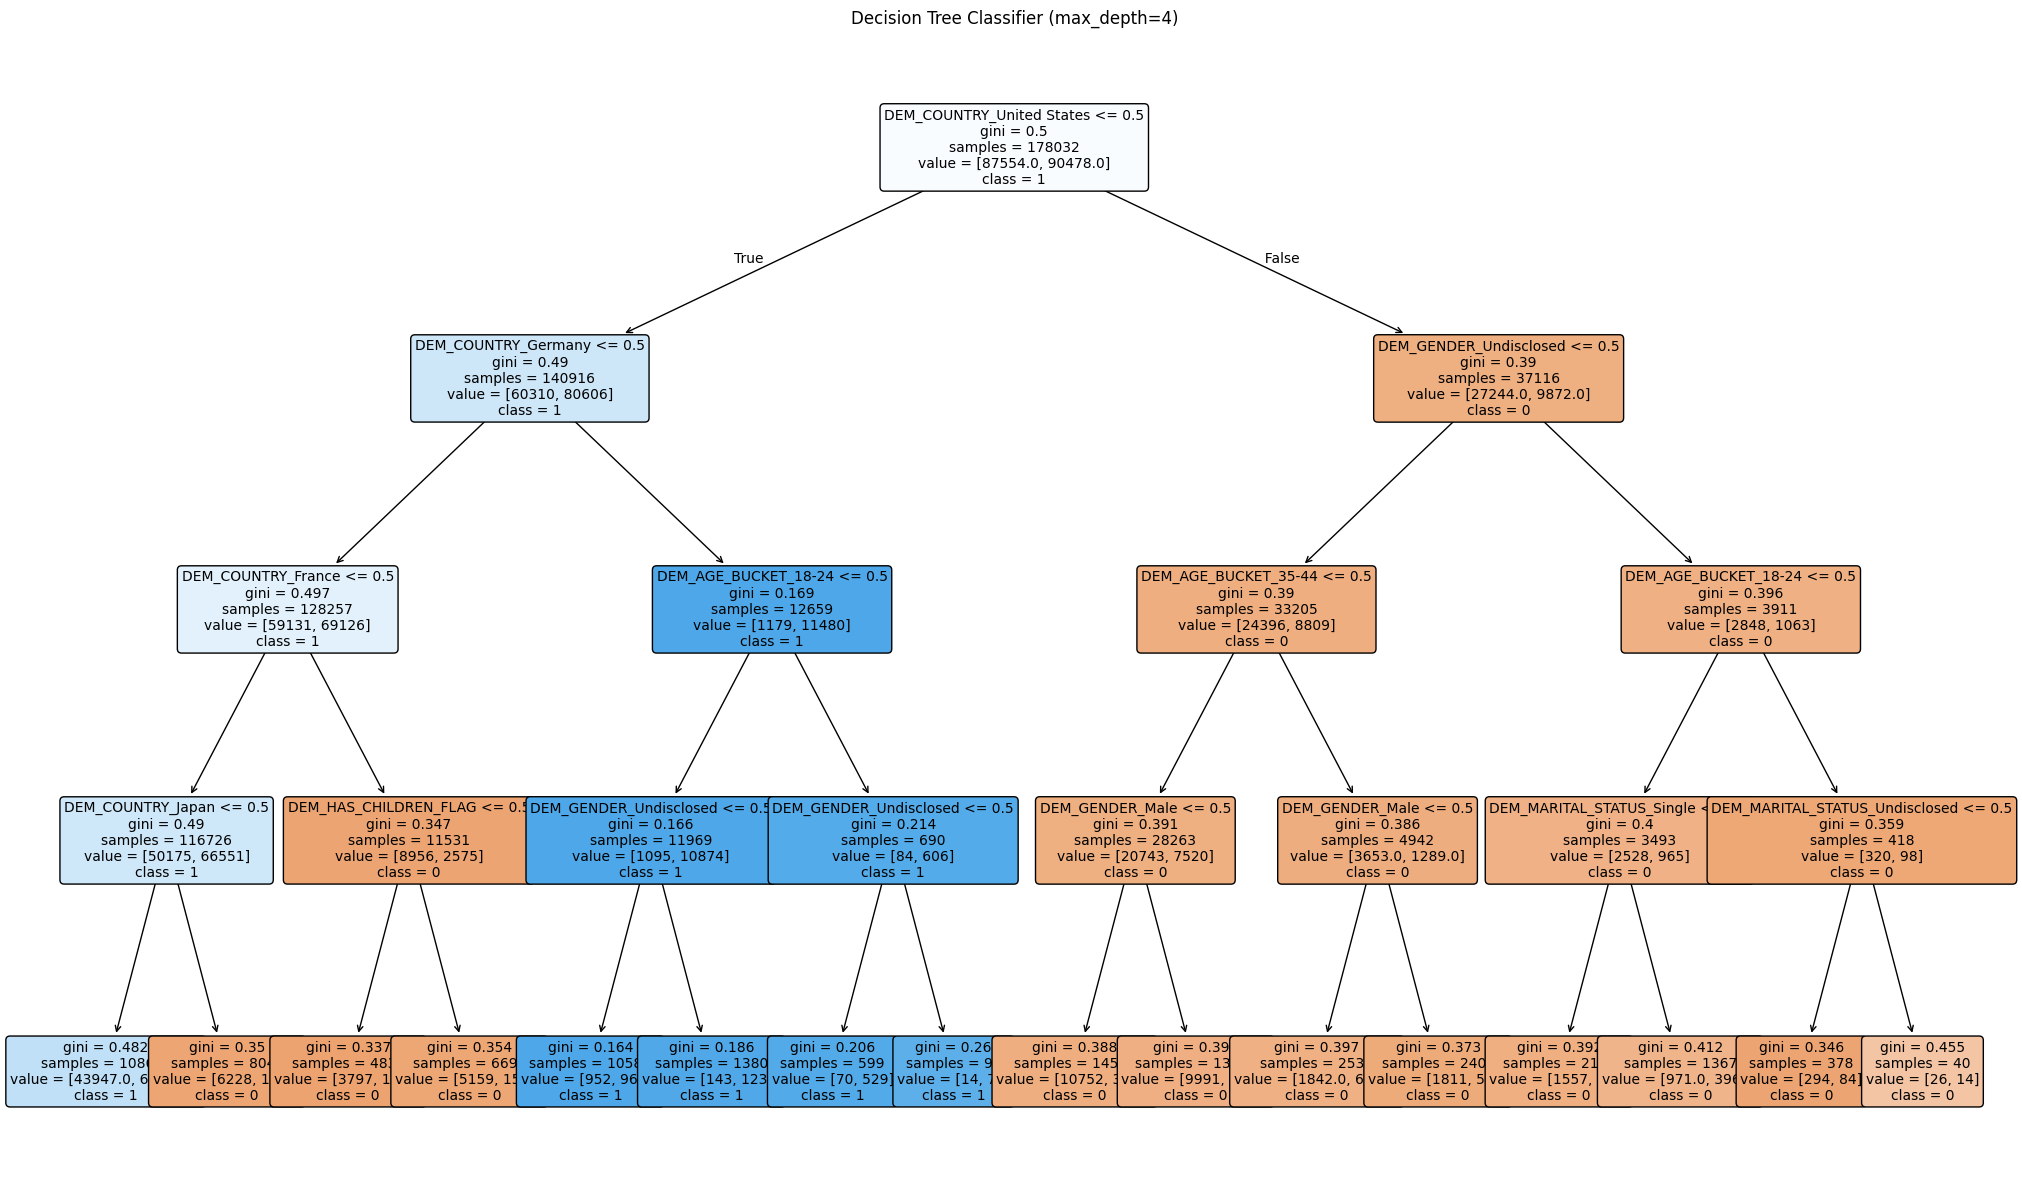


Decision Rules:
|--- DEM_COUNTRY_United States <= 0.50
|   |--- DEM_COUNTRY_Germany <= 0.50
|   |   |--- DEM_COUNTRY_France <= 0.50
|   |   |   |--- DEM_COUNTRY_Japan <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- DEM_COUNTRY_Japan >  0.50
|   |   |   |   |--- class: 0
|   |   |--- DEM_COUNTRY_France >  0.50
|   |   |   |--- DEM_HAS_CHILDREN_FLAG <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- DEM_HAS_CHILDREN_FLAG >  0.50
|   |   |   |   |--- class: 0
|   |--- DEM_COUNTRY_Germany >  0.50
|   |   |--- DEM_AGE_BUCKET_18-24 <= 0.50
|   |   |   |--- DEM_GENDER_Undisclosed <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- DEM_GENDER_Undisclosed >  0.50
|   |   |   |   |--- class: 1
|   |   |--- DEM_AGE_BUCKET_18-24 >  0.50
|   |   |   |--- DEM_GENDER_Undisclosed <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- DEM_GENDER_Undisclosed >  0.50
|   |   |   |   |--- class: 1
|--- DEM_COUNTRY_United States >  0.50
|   |--- DEM_GENDER_Undisclosed <= 0.50
|   |   |--- DE

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

# Prepare class names as strings for visualization
class_names = [str(c) for c in dt_classifier.classes_]

# Visualize the Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(dt_classifier,
          feature_names=X.columns,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Classifier (max_depth=4)')
plt.show()

# Extract and print decision rules
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print("\nDecision Rules:")
print(tree_rules)

## Interpretacija modela: Napovedi in primernost za Cold Start

### Subtask:
S pomočjo modela generirajte napovedane 'cluster_label' za nove kupce ter prikažite verjetnosti pripadnosti posameznim clusterjem. Podajte kratek komentar o primernosti modela za reševanje 'cold start' problema in navedite morebitne omejitve modela.


**Reasoning**:
I need to create a sample DataFrame representing a new, hypothetical customer for prediction. This DataFrame should have the same columns as the training data `X` and be initialized with zeros, then specific demographic features will be set to 1 to simulate a new customer profile. After creating the sample customer, I will use the trained Decision Tree Classifier to predict the cluster label and the probabilities of belonging to each cluster.



In [26]:
import numpy as np

# Create a sample DataFrame for a new customer with all features initialized to 0
X_new = pd.DataFrame(0, index=[0], columns=X.columns)

# Simulate a new customer: female, single, from the United States, in the 25-34 age bucket
X_new['DEM_GENDER_Male'] = 0 # Female
X_new['DEM_MARITAL_STATUS_Single'] = 1 # Single
X_new['DEM_COUNTRY_United States'] = 1 # United States
X_new['DEM_AGE_BUCKET_25-34'] = 1 # 25-34 age bucket

# Predict the cluster label for the new customer
predicted_cluster = dt_classifier.predict(X_new)

# Predict the probabilities for each cluster for the new customer
predicted_proba = dt_classifier.predict_proba(X_new)

print(f"Predicted Cluster for the new customer: {predicted_cluster[0]}")
print(f"Probabilities of belonging to each cluster: {predicted_proba[0]}")

Predicted Cluster for the new customer: 0
Probabilities of belonging to each cluster: [0.73679161 0.26320839]


### Model Suitability for 'Cold Start' Problem and Limitations

**Suitability for 'Cold Start' Problem:**

The Decision Tree Classifier, built solely on demographic features, shows promise for addressing the 'cold start' problem. 'Cold start' refers to the challenge of providing recommendations or personalized experiences for new customers about whom we have little to no behavioral data. Since demographic attributes (such as country, age, gender, marital status, and presence of children) are typically available upon customer registration, this model can immediately assign a new customer to a predicted cluster. This allows businesses to tailor initial interactions, marketing campaigns, or product recommendations based on the demographic profile, even before the customer has made any purchases or exhibited any behavioral patterns.

For example, if a new customer is identified as belonging to 'Cluster 0' based on their demographics, the business can immediately apply strategies designed for 'Cluster 0' customers, rather than waiting for sufficient behavioral data to accumulate. The model provides a probabilistic assignment, giving insight into the confidence of the prediction.

**Limitations of the Current Model:**

While useful for cold start scenarios, this specific model has several limitations:

1.  **Limited `max_depth`:** The `max_depth=4` constraint was intentionally set for interpretability, but it limits the model's complexity and ability to capture intricate relationships within the data. This simplification can lead to lower predictive accuracy compared to deeper trees or more complex models.
2.  **Reliance on Demographic Features:** While advantageous for cold start, relying *only* on demographic features might be insufficient for highly accurate customer segmentation. Customer behavior, preferences, and transactional history often provide richer insights into their actual needs and tendencies. A model solely based on demographics might miss subtle distinctions between customers who are demographically similar but behave very differently.
3.  **Generalizability:** The model's generalizability might be limited. If the demographic distribution of future new customers significantly deviates from the training data, the predictions might become less reliable.
4.  **Performance on Different Customer Segments:** The classification report indicates varying performance across clusters. For instance, the recall for class 0 (48%) is significantly lower than for class 1 (84%), suggesting that the model is less effective at correctly identifying all instances of 'Cluster 0' customers. This imbalance in performance might mean that some customer segments are not being accurately identified, potentially leading to suboptimal initial strategies for those groups.
5.  **Interpretability vs. Accuracy Trade-off:** By prioritizing interpretability through a shallow tree, we implicitly accept a trade-off with accuracy. For critical business decisions, a more accurate model (even if less interpretable) might be preferred, or an ensemble of models could be considered.

In summary, the model serves as a good starting point for cold start scenarios by leveraging readily available demographic data. However, its simplified structure and sole reliance on demographics are considerable limitations, and future iterations should consider incorporating behavioral data once available, or exploring more complex model architectures if higher accuracy is required.

### Model Suitability for 'Cold Start' Problem and Limitations

**Suitability for 'Cold Start' Problem:**

The Decision Tree Classifier, built solely on demographic features, shows promise for addressing the 'cold start' problem. 'Cold start' refers to the challenge of providing recommendations or personalized experiences for new customers about whom we have little to no behavioral data. Since demographic attributes (such as country, age, gender, marital status, and presence of children) are typically available upon customer registration, this model can immediately assign a new customer to a predicted cluster. This allows businesses to tailor initial interactions, marketing campaigns, or product recommendations based on the demographic profile, even before the customer has made any purchases or exhibited any behavioral patterns.

For example, if a new customer is identified as belonging to 'Cluster 0' based on their demographics, the business can immediately apply strategies designed for 'Cluster 0' customers, rather than waiting for sufficient behavioral data to accumulate. The model provides a probabilistic assignment, giving insight into the confidence of the prediction.

**Limitations of the Current Model:**

While useful for cold start scenarios, this specific model has several limitations:

1.  **Limited `max_depth`:** The `max_depth=4` constraint was intentionally set for interpretability, but it limits the model's complexity and ability to capture intricate relationships within the data. This simplification can lead to lower predictive accuracy compared to deeper trees or more complex models.
2.  **Reliance on Demographic Features:** While advantageous for cold start, relying *only* on demographic features might be insufficient for highly accurate customer segmentation. Customer behavior, preferences, and transactional history often provide richer insights into their actual needs and tendencies. A model solely based on demographics might miss subtle distinctions between customers who are demographically similar but behave very differently.
3.  **Generalizability:** The model's generalizability might be limited. If the demographic distribution of future new customers significantly deviates from the training data, the predictions might become less reliable.
4.  **Performance on Different Customer Segments:** The classification report indicates varying performance across clusters. For instance, the recall for class 0 (48%) is significantly lower than for class 1 (84%), suggesting that the model is less effective at correctly identifying all instances of 'Cluster 0' customers. This imbalance in performance might mean that some customer segments are not being accurately identified, potentially leading to suboptimal initial strategies for those groups.
5.  **Interpretability vs. Accuracy Trade-off:** By prioritizing interpretability through a shallow tree, we implicitly accept a trade-off with accuracy. For critical business decisions, a more accurate model (even if less interpretable) might be preferred, or an ensemble of models could be considered.

In summary, the model serves as a good starting point for cold start scenarios by leveraging readily available demographic data. However, its simplified structure and sole reliance on demographics are considerable limitations, and future iterations should consider incorporating behavioral data once available, or exploring more complex model architectures if higher accuracy is required.

## Final Task

### Subtask:
Podajte povzetek analize, vključno z ugotovitvami in priporočili, ter opredelite naslednje korake.


## Summary:

### Q&A

*   **How does the model predict customer segments?**
    The model predicts customer segments using a Decision Tree Classifier trained on demographic attributes. It identifies rules based primarily on the customer's country to assign them to either 'Cluster 0' or 'Cluster 1'. For a hypothetical new customer (female, single, from the United States, 25-34 age bucket), the model predicted 'Cluster 0' with a probability of 73.68%.
*   **What is the performance of the Decision Tree Classifier?**
    The Decision Tree Classifier achieved an accuracy of approximately 66.74% on the test set. Performance varied by class, with 'Cluster 1' showing higher recall (84%) and 'Cluster 0' having higher precision (75%), but lower recall (48%). The overall macro average F1-score was 0.65.
*   **What are the actionable decision rules derived from the model?**
    The model's decision rules are primarily driven by country-specific attributes. For example, customers from the United States, Germany, France, or Japan are largely differentiated into specific clusters based on the presence or absence of these country flags. Many rules follow the pattern "If DEM\_COUNTRY\_[Country] <= 0.50 (meaning not from that country) and other conditions, then class: [Cluster ID]".
*   **Is the model suitable for solving 'cold start' problems?**
    Yes, the model shows promise for addressing the 'cold start' problem. Since it relies solely on readily available demographic attributes at customer registration, it can immediately assign new customers to a predicted cluster, allowing for tailored initial interactions, marketing campaigns, or product recommendations without requiring prior behavioral data.
*   **What are the limitations of the model?**
    The model has several limitations: its constrained `max_depth=4` limits complexity and accuracy, its sole reliance on demographic features may miss behavioral nuances, generalizability might be limited if future customer demographics differ, and there's varying performance across customer segments (e.g., lower recall for 'Cluster 0'). There is also an inherent trade-off between interpretability and predictive accuracy.

### Data Analysis Key Findings

*   The dataset `ABT_with_clusters.csv` contains 222,540 entries with no missing values in the selected demographic and target columns.
*   Selected demographic attributes ('DEM_COUNTRY', 'DEM_COUNTRY_GROUP', 'DEM_CONTINENT', 'DEM_GENDER', 'DEM_MARITAL_STATUS', 'DEM_HAS_CHILDREN_FLAG', 'DEM_AGE_BUCKET') and the target variable 'Cluster\_ID' were successfully extracted.
*   Categorical features were transformed using One-Hot Encoding, resulting in 43 numerical features for the model.
*   The data was split into training (178,032 samples) and testing (44,508 samples) sets with an 80/20 ratio and stratified sampling for balanced cluster representation.
*   A Decision Tree Classifier trained with a `max_depth` of 4 achieved an overall accuracy of 66.74% on the test set.
*   The model demonstrated better recall for 'Cluster 1' (84%) than for 'Cluster 0' (48%), while precision was higher for 'Cluster 0' (75%) compared to 'Cluster 1' (63%).
*   Feature importance analysis revealed that country-related attributes, specifically `DEM_COUNTRY_United States` (0.4167), `DEM_COUNTRY_Germany` (0.2361), `DEM_COUNTRY_France` (0.1912), and `DEM_COUNTRY_Japan` (0.1551), are overwhelmingly the most influential features in predicting customer segments, collectively accounting for over 99% of total importance. Other demographic features showed negligible importance.
*   Actionable decision rules were successfully extracted, illustrating how country-specific conditions lead to customer segment assignments.

### Insights or Next Steps

*   **Insight:** The customer's country of origin is by far the most significant demographic factor influencing cluster assignment according to this model. This suggests a strong geographical component to customer segmentation.
*   **Next Steps:** To improve model accuracy and capture more nuanced customer behavior beyond initial demographic assignment, consider incorporating behavioral data (once available) or exploring more complex model architectures in future iterations. Additionally, addressing the imbalance in recall between clusters could lead to more robust segmentation across all groups.
